# Comparación general de resultados

In [1]:
#Importando librearias
import sys
import os
import json
import tempfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
sys.path.append('../')
sys.path.append('../../')
from sklearn.svm import SVC
from Resources.mlTracker import *
from Python.Style.styles import  *
from scipy.stats import expon, randint
from mlflow.tracking import MlflowClient

In [2]:
#Desactivando wrnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Utilizando diseño base 1
plt.style.use('../../Python/Style/style1.mplstyle')

In [4]:
#Colores base
#Diseño base
mClr = designC['cs']
mClr_d2 = plt.get_cmap('cs-d')(2)
sClr1 = designC['nr']
sClr1_d2 = plt.get_cmap('nr-d')(2)
sClr3 = designC['az']
sClr2 = designC['gr']
sClr2_d = plt.get_cmap('gr-d')(0)
sClr2_d2 = plt.get_cmap('gr-d')(2)
sClr4 = designC['vr']
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [20]:
#Leyendo tablas de resultados
ml_results = pd.read_parquet('../../Data/DataMart/temp/results.parquet')
dl_results = pd.read_parquet('../../Data/DataMart/temp/results_dl.parquet')

## Comparación general problema 1

In [22]:
#Seleccionando para p1
#ML
ml_p1_models = ['ML-RF-Training-Oversampled Test1','ML-GBC-Training-Undersampled Test1']
ml_p1 = ml_results[ml_results['name'].isin(ml_p1_models)]
#DL
dl_p1_models = ['DL4-ANN-os_2_acc_thres Test1']
dl_p1 = dl_results[dl_results['name'].isin(dl_p1_models)]
#Cambio name
dic = {'name':'Modelo'}
ml_p1 = ml_p1.rename(columns=dic)
dl_p1 = dl_p1.rename(columns=dic)
#Concatenando
p1 = pd.concat([ml_p1,dl_p1])
#Eliminando Test1
p1['Modelo'] = p1['Modelo'].str.replace(' Test1','')
p1.head()

,Modelo,F1 Score Macro,F1 Score Weighted,Accuracy,Recall,F1 Score Micro,True Positives,True Negatives,Precision,False Negatives,False Positives,Test,Experiment,Algoritmo,DatosEntrenamiento,MPCA,Threshold,DeepLayers,Extra
23,ML-GBC-Training-Undersampled,0.946968,0.991427,0.991048,0.991259,0.991048,50694.0,2114.0,0.999409,447.0,30.0,Test1,ML,GBC,Training_US,0.988633,NaN,NaN,NaN
25,ML-RF-Training-Oversampled,0.983602,0.997467,0.997466,0.998670,0.997466,51073.0,2077.0,0.998690,68.0,67.0,Test1,ML,RF,Training_OS,0.983710,NaN,NaN,NaN
27,DL4-ANN-os_2_acc_thres,0.839709,0.971398,0.967664,0.969574,0.967664,49585.0,1977.0,0.996643,1556.0,167.0,Test1,DL4,NaN,Oversampled,0.945841,acc,3.0,-


Text(0.5, 1.0, 'Accuracy por modelo para P1')

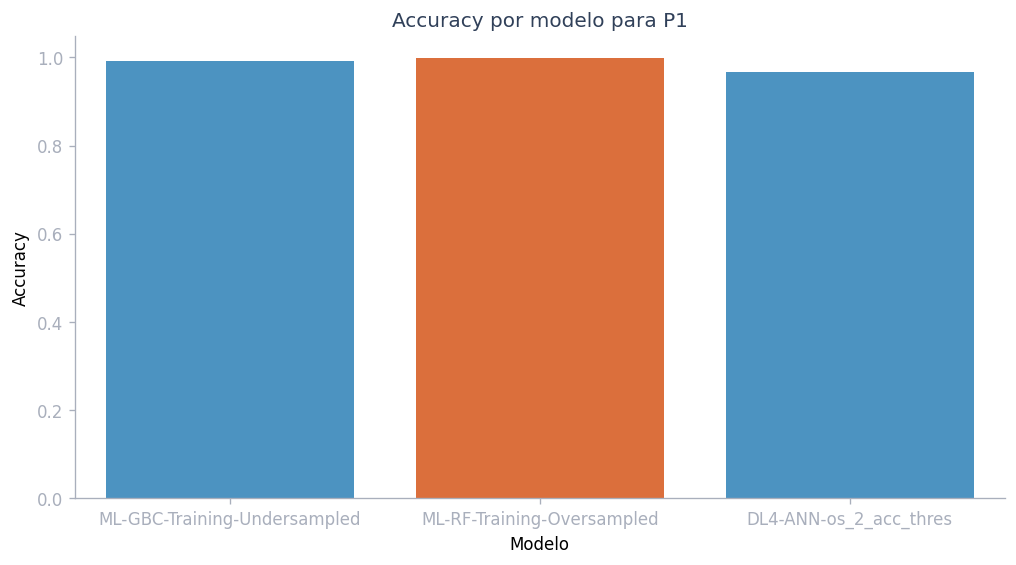

In [28]:
#Gráfica de barras por métrica Accuracy
#Diferenciando máximo por color
p1['Color'] = [sClr1 if x == p1['Accuracy'].max() else mClr for x in p1['Accuracy']]
#Accuracy
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Modelo',y='Accuracy',data=p1,palette=p1['Color'])
plt.title('Accuracy por modelo para P1')

Text(0.5, 1.0, 'F1 por modelo para P1')

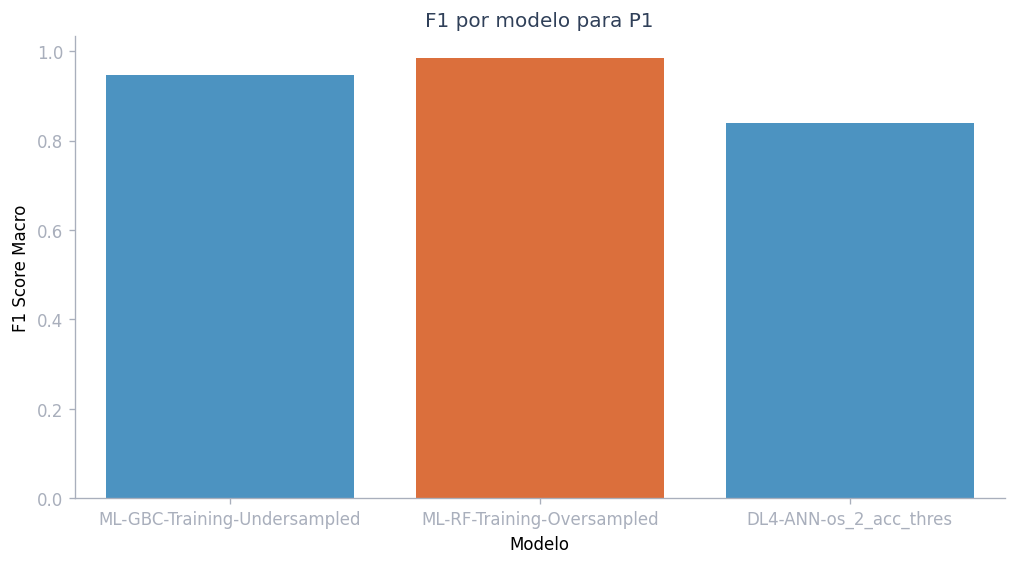

In [30]:
#Gráfica de barras por métrica F1
#Diferenciando máximo por color
p1['Color'] = [sClr1 if x == p1['F1 Score Macro'].max() else mClr for x in p1['F1 Score Macro']]
#F1
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Modelo',y='F1 Score Macro',data=p1,palette=p1['Color'])
plt.title('F1 por modelo para P1')

Text(0.5, 1.0, 'MPCA por modelo para P1')

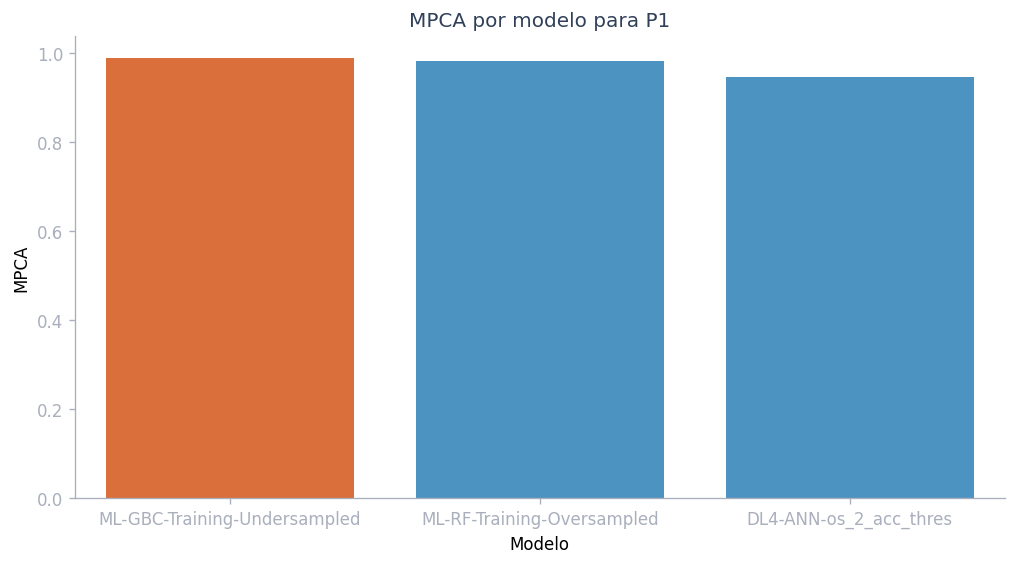

In [31]:
#Gráfica de barras por métrica MPCA
#Diferenciando máximo por color
p1['Color'] = [sClr1 if x == p1['MPCA'].max() else mClr for x in p1['MPCA']]
#MPCA
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Modelo',y='MPCA',data=p1,palette=p1['Color'])
plt.title('MPCA por modelo para P1')

## Comparación general Problema 2

In [36]:
#Seleccionando para p1
#ML
ml_p2_models = ['ML-RF-Training Test2','ML-RF-Training-Undersampled Test2','ML2-RF-Training-Undersampled Test2']
ml_p2 = ml_results[ml_results['name'].isin(ml_p2_models)]
#DL
dl_p2_models = ['DL-ANN-os_1_extra_t_acc_thres Test2','DL-ANN-os_1_extra_t_f1_thres Test2','DL-ANN-os_1_extra_t_mpca_thres Test2','DL-ANN-os_2_extra_us_f1_thres Test2']
dl_p2 = dl_results[dl_results['name'].isin(dl_p2_models)]
#Cambio name
dic = {'name':'Modelo'}
ml_p2 = ml_p2.rename(columns=dic)
dl_p2 = dl_p2.rename(columns=dic)
#Concatenando
p2 = pd.concat([ml_p2,dl_p2])
#Eliminando Test1
p2['Modelo'] = p2['Modelo'].str.replace(' Test2','')
p2

,Modelo,F1 Score Macro,F1 Score Weighted,Accuracy,Recall,F1 Score Micro,True Positives,True Negatives,Precision,False Negatives,False Positives,Test,Experiment,Algoritmo,DatosEntrenamiento,MPCA,Threshold,DeepLayers,Extra
8,ML2-RF-Training-Undersampled,0.590717,0.877167,0.839213,0.852599,0.839213,63534.0,2356.0,0.974837,10984.0,1640.0,Test2,ML2,RF,Training_US,0.721094,NaN,NaN,NaN
26,ML-RF-Training-Undersampled,0.660854,0.941512,0.948735,0.985171,0.948735,73413.0,1076.0,0.961747,1105.0,2920.0,Test2,ML,RF,Training_US,0.627220,NaN,NaN,NaN
28,ML-RF-Training,0.532310,0.929665,0.950760,0.999181,0.950760,74457.0,191.0,0.951381,61.0,3805.0,Test2,ML,RF,Training,0.523490,NaN,NaN,NaN
14,DL-ANN-os_1_extra_t_acc_thres,0.605318,0.931817,0.940100,0.980448,0.940100,73061.0,750.0,0.957461,1457.0,3246.0,Test2,DL,NaN,Oversampled,0.584068,acc,2.0,Training
16,DL-ANN-os_1_extra_t_f1_thres,0.631761,0.927383,0.925924,0.958641,0.925924,71436.0,1262.0,0.963139,3082.0,2734.0,Test2,DL,NaN,Oversampled,0.637228,f1,2.0,Training
10,DL-ANN-os_2_extra_us_f1_thres,0.529871,0.812846,0.740989,0.743391,0.740989,55396.0,2782.0,0.978555,19122.0,1214.0,Test2,DL,NaN,Oversampled,0.719794,f1,3.0,Undersampled
12,DL-ANN-os_1_extra_t_mpca_thres,0.565044,0.851052,0.798151,0.806141,0.798151,60072.0,2594.0,0.977194,14446.0,1402.0,Test2,DL,NaN,Oversampled,0.727645,mpca,2.0,Training


Text(0.5, 1.0, 'Accuracy por modelo para P2')

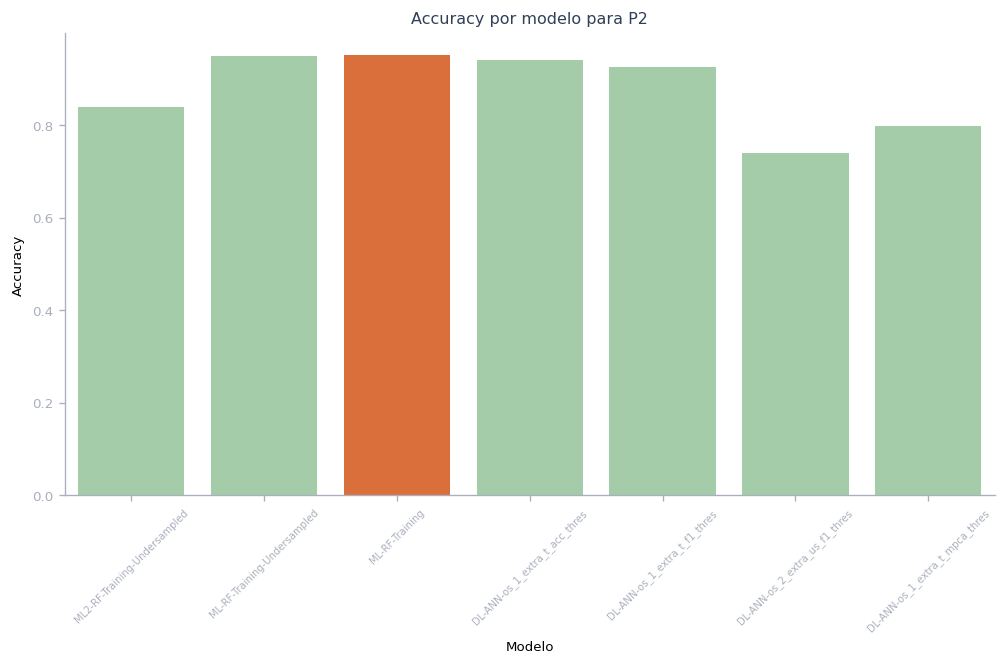

In [47]:
#Gráfica de barras por métrica Accuracy
#Diferenciando máximo por color
p2['Color'] = [sClr1 if x == p2['Accuracy'].max() else sClr4 for x in p2['Accuracy']]
#Accuracy
fig, ax = plt.subplots(1,1,figsize=(10,5))
#Rotando etiqueta x
plt.xticks(rotation=45)
#Reduciendo tamaño de fuente para eje x
plt.tick_params(axis='x',labelsize=6)
sns.barplot(x='Modelo',y='Accuracy',data=p2,palette=p2['Color'])
plt.title('Accuracy por modelo para P2')

Text(0.5, 1.0, 'F1 por modelo para P2')

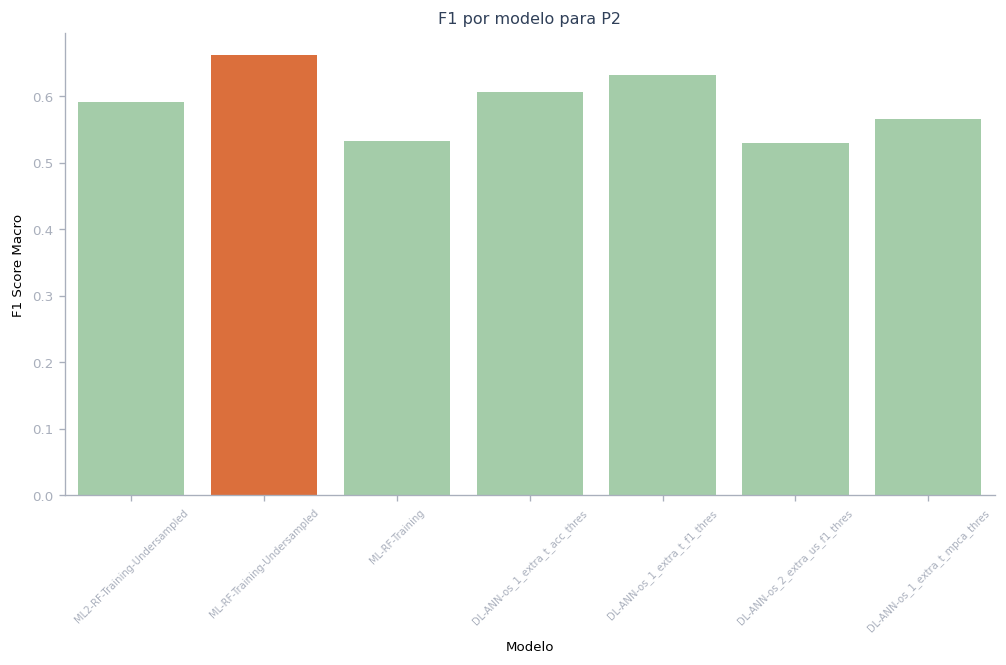

In [48]:
#Gráfica de barras por métrica F1
#Diferenciando máximo por color
p2['Color'] = [sClr1 if x == p2['F1 Score Macro'].max() else sClr4 for x in p2['F1 Score Macro']]
#F1
fig, ax = plt.subplots(1,1,figsize=(10,5))
#Rotando etiqueta x
plt.xticks(rotation=45)
#Reduciendo tamaño de fuente para eje x
plt.tick_params(axis='x',labelsize=6)
sns.barplot(x='Modelo',y='F1 Score Macro',data=p2,palette=p2['Color'])
plt.title('F1 por modelo para P2')

Text(0.5, 1.0, 'MPCA por modelo para P2')

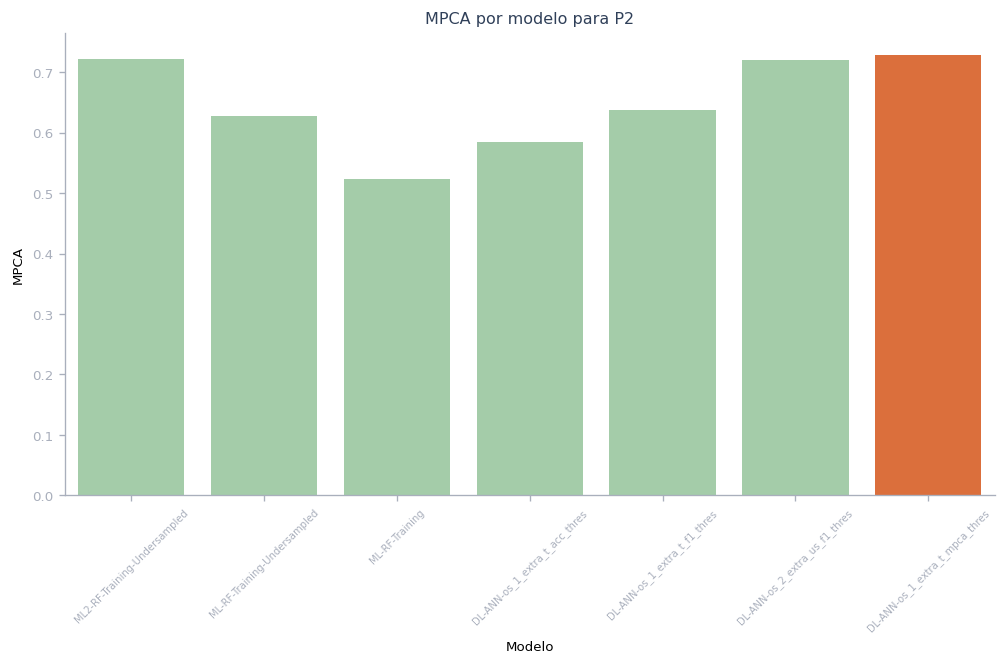

In [49]:
#Gráfica de barras por métrica MPCA
#Diferenciando máximo por color
p2['Color'] = [sClr1 if x == p2['MPCA'].max() else sClr4 for x in p2['MPCA']]
#MPCA
fig, ax = plt.subplots(1,1,figsize=(10,5))
#Rotando etiqueta x
plt.xticks(rotation=45)
#Reduciendo tamaño de fuente para eje x
plt.tick_params(axis='x',labelsize=6)
sns.barplot(x='Modelo',y='MPCA',data=p2,palette=p2['Color'])
plt.title('MPCA por modelo para P2')